In [38]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("./data/토지현황(지목별_법정동별)_20240227145606.csv")

In [43]:
df1 = df1[df1["동별(3)"] !="소계"]

In [46]:
df1["동별(3)"]

2      청운동
3      신교동
4      궁정동
5      효자동
6      창성동
      ... 
488    둔촌동
489    암사동
490    성내동
491    천호동
492    강일동
Name: 동별(3), Length: 467, dtype: object

In [54]:


df = pd.DataFrame({
    '편의성': np.random.rand(467) * 100,
    '문화여가성': np.random.rand(467) * 100,
    '교통성': np.random.rand(467) * 100,
    '생활 치안': np.random.rand(467) * 100,
})

# 각 지표별 점수화 (예: 단순히 100점 만점에서의 값을 사용)
df['종합 점수'] = df.apply(lambda x: sum(x[col] * weight for col, weight in weights.items()), axis=1)

df.index = df1["동별(3)"]
df.index.name = "town_name"
df

,편의성,문화여가성,교통성,생활 치안,종합 점수
town_name,,,,,
청운동,54.997203,24.934440,17.425251,86.351270,45.927041
신교동,43.001156,49.234836,37.896468,35.956490,41.522237
궁정동,35.643389,98.522366,44.002742,20.636520,49.701254
효자동,38.386853,15.662676,94.624155,61.380811,52.513624
창성동,19.591813,76.746931,11.558953,40.129159,37.006714
...,...,...,...,...,...
둔촌동,71.588782,88.056022,56.557215,55.851070,68.013272
암사동,30.487647,55.786143,2.971199,69.182498,39.606872
성내동,6.700173,95.266447,23.758140,56.116376,45.460284


In [61]:
def weight_custom(convenience,culture,transfort,safe):
  weights = {'편의성': convenience, '문화여가성': culture, '교통성': transfort, '생활 치안': safe}
  df['종합 점수'] = df.apply(lambda x: sum(x[col] * weight for col, weight in weights.items()), axis=1)
  top_score_row = df.nlargest(3, '종합 점수',keep='all')
  return top_score_row

In [17]:

  
def weight_custom(convenience, culture, transport, safe):
  # 가중치 설정
  weights = {'편의성': convenience, '문화여가성': culture, '교통성': transport, '생활 치안': safe}
  
  # 종합 점수 계산
  df['종합 점수'] = df.apply(lambda x: sum(x[col] * weight for col, weight in weights.items()), axis=1)
  
  top_score_row = df.nlargest(1, '종합 점수', keep='all')
  
  # 결과를 딕셔너리 형태로 변환
  result_dict = top_score_row.to_dict('records')[0]  # 'records' 모드는 각 행을 딕셔너리로 변환
  result_dict['인덱스'] = top_score_row.index.tolist()  
  
  return result_dict


In [62]:
items = weight_custom(0.5,0.25,1,0.25)

In [58]:
from openai import OpenAI
from getpass import getpass

api_key = getpass(
)
openai_client = OpenAI(api_key=api_key)

In [85]:
items

,편의성,문화여가성,교통성,생활 치안,종합 점수
town_name,,,,,
동선동3가,99.217494,92.614387,92.619488,95.561741,189.272267
답십리동,97.341735,55.312983,97.255377,72.736562,177.938631
미아동,68.729402,76.490564,95.541539,97.497280,173.403201


In [88]:
items.items()

<generator object DataFrame.items at 0x00000293472DF790>

In [104]:
len(items)

3

In [105]:
for j in range(len(items)):
  print("")
  print(items.iloc[j].name)
  for i,item in items.items():
    print(i,items.iloc[j][i])


동선동3가
편의성 99.21749402505279
문화여가성 92.61438691170724
교통성 92.61948834209406
생활 치안 95.56174126430325
종합 점수 189.27226739862306

답십리동
편의성 97.34173459691495
문화여가성 55.31298251551051
교통성 97.2553774250624
생활 치안 72.7365621254549
종합 점수 177.93863088376122

미아동
편의성 68.72940190257235
문화여가성 76.49056364463272
교통성 95.5415386464664
생활 치안 97.49728023695673
종합 점수 173.40320056814994


In [175]:
items.iloc[0]

편의성       99.217494
문화여가성     92.614387
교통성       92.619488
생활 치안     95.561741
종합 점수    189.272267
Name: 동선동3가, dtype: float64

In [79]:
items.iloc[0].name

'동선동3가'

In [132]:
def generate_prompt(items):
  item_text=""
  for j in range(len(items)):
    item_text += f"""
    추천 결과 {j+1}
    동네: {items.iloc[j].name}
    편의성: {items.iloc[j][0]}
    문화여가성: {items.iloc[j][1]}
    교통성: {items.iloc[j][2]}
    생활 치안: {items.iloc[j][3]}
    종합 점수: {items.iloc[j][4]}
    """
    
  item_text = item_text.strip()
  prompt= f"""유저가 입력한 살기 좋은 동네의 각 지표의 선호도에 따른 추천 결과가 주어집니다.
유저의 입력과 각 추천 결과 동네, 편의성, 문화여가성,교통성,생활 치안,종합 점수 등을 참고하여 추천 동네를 작성하세요.
그 동네에 대한 정보를 검색해서 구체적으로 작성하세요.
20~30대 사회초년생을 위해서 작성하세요.
당신에 대한 소개를 먼저 하고, 친절한 말투로 작성해주세요.
중간 중간 이모지를 적절히 사용해주세요.
그 동네 주변의 카페를 검색해서 추천해주세요.

---
유저 입력: 
{item_text}
---
""".strip()
  return prompt

In [125]:
prompt = generate_prompt(items)
print(prompt)

유저가 입력한 살기 좋은 동네의 각 지표의 선호도에 따른 추천 결과가 주어집니다.
유저의 입력과 각 추천 결과 동네, 편의성, 문화여가성,교통성,생활 치안,종합 점수 등을 참고하여 추천 동네를 작성하세요.
그 동네에 대한 정보를 검색해서 같이 작성하세요.
당신에 대한 소개를 먼저 하고, 친절한 말투로 작성해주세요.
중간 중간 이모지를 적절히 사용해주세요.

---
유저 입력: 
추천 결과 1
    동네: 동선동3가
    편의성: 99.21749402505279
    문화여가성: 92.61438691170724
    교통성: 92.61948834209406
    생활 치안: 95.56174126430325
    종합 점수: 189.27226739862306
    
    추천 결과 2
    동네: 답십리동
    편의성: 97.34173459691495
    문화여가성: 55.31298251551051
    교통성: 97.2553774250624
    생활 치안: 72.7365621254549
    종합 점수: 177.93863088376122
    
    추천 결과 3
    동네: 미아동
    편의성: 68.72940190257235
    문화여가성: 76.49056364463272
    교통성: 95.5415386464664
    생활 치안: 97.49728023695673
    종합 점수: 173.40320056814994
---


In [130]:
def requests_chat_completion(prompt):
  response = openai_client.chat.completions.create(
    model="gpt-4-turbo-preview",
    messages=[
      {"role":"system","content":"당신은 20~30대 사회초년생을 위한 살기 좋은 동네를 추천해주는 AI 중개인 판타입니다."},
      {"role":"user","content":prompt}
    ],
    stream=True
  )
  return response


In [ ]:
#google placesapi

In [133]:
response = requests_chat_completion(prompt)
for chunk in response:
  delta = chunk.choices[0].delta
  if delta.content:
    print(delta.content,end="")

안녕하세요! 저는 20~30대 사회초년생을 위한 살기 좋은 동네를 추천해드리는 AI 중개인, 판타입니다. 🌈 새로운 시작을 준비하고 있는 여러분께 가장 알맞는 동네를 찾아드리기 위해 항상 노력하고 있어요.

여러분이 입력해 주신 선호도를 바탕으로, 세 가지 동네가 추천 결과로 나타났네요. 이 중에서 제가 특별히 추천드리고 싶은 동네는 바로 `동선동3가`입니다! 🌟 동선동3가는 편의성, 문화여가성, 교통성, 생활치안 모두에서 높은 점수를 획득하여 종합 점수에서도 가장 우수한 평가를 받았어요. 상세한 정보와 함께, 동선동3가가 왜 좋은 선택지인지 설명드릴게요.

### 동선동3가에 대하여

- **편의성 (99.217점):** 동선동3가의 편의성은 거의 완벽에 가깝습니다. 다양한 생활 편의시설과 상점들이 밀집해 있어, 일상생활에서 필요한 거의 모든 것을 쉽게 발견하고 이용하실 수 있어요. 카페, 음식점, 슈퍼마켓 등이 걸어서 이용하기 편리하게 위치해 있죠.
  
- **문화여가성 (92.614점):** 동선동3가는 문화와 여가 활동을 즐길 수 있는 기회가 많아요. 주변에 공원, 영화관, 전시회 등을 즐길 수 있는 공간이 많아 여가생활을 풍부하게 만들어 줍니다.
  
- **교통성 (92.619점):** 대중교통 접근성이 뛰어나서 서울 내 어디로든 이동하기 편리해요. 버스와 지하철을 쉽게 이용할 수 있는 위치에 있어 출퇴근이나 외출 시 시간을 절약할 수 있습니다.

- **생활 치안 (95.561점):** 안전한 동네 생활을 위해서는 치안도 중요한데, 동선동3가는 생활 치안 면에서도 높은 점수를 받았어요. 안심하고 밤늦게까지 외출이 가능하답니다.

종합 점수 189.272을 보여주면서, 동선동3가는 사회초년생 여러분이 삶의 질을 높이며 살아갈 수 있는 매우 매력적인 지역임을 보여줍니다. 도시의 중심에서 활발한 생활을 즐기면서도, 일상에 필요한 모든 것을 근처에서 해결하고 싶은 분들에게 특히 추천드려요 💐.

마음에 드시는 지역인가요? 추가적으로 궁금한 사항이 있으시

In [199]:
items.index[0]

'동선동3가'

In [190]:
round(99.255,2)

99.25

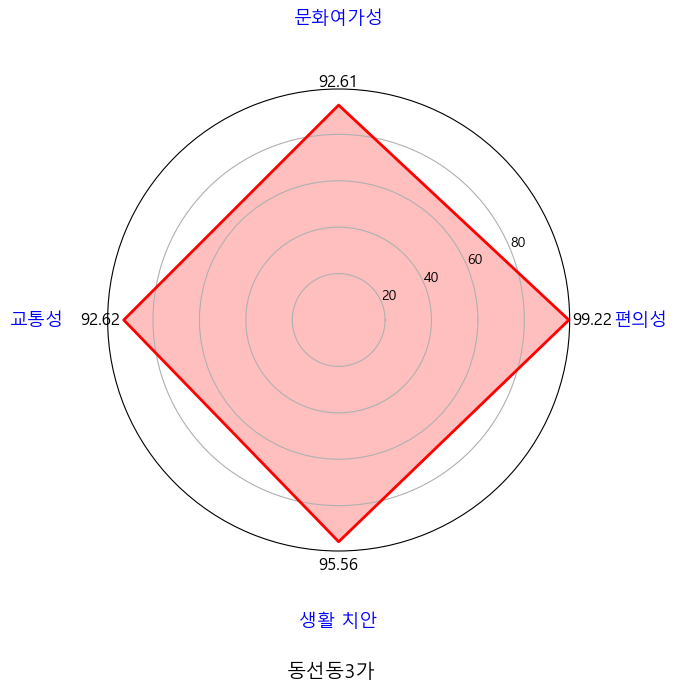

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.rcParams['font.family'] = 'Malgun Gothic'






index_name = items.index[0]
labels = items.columns.values[:-1]
scores = items.iloc[0].values[:-1].round(2)


angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scores = np.concatenate((scores,[scores[0]]))  
angles += angles[:1]  


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='red', alpha=0.25)
ax.plot(angles, scores, color='red', linewidth=2)


ax.set_xticks([])


for angle, score in zip(angles[:-1], scores[:-1]):
    ax.text(angle, score + 10, str(score), horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
for angle, label in zip(angles[:-1], labels):
    ax.text(angle, 130, label, horizontalalignment='center', verticalalignment='center', fontsize=13, color='blue')
plt.text(0.5, -0.1, index_name, size=14, ha='center', transform=fig.transFigure)
plt.show()






In [ ]:
import folium
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)